In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
rng = np.random.RandomState(42)

Create a dictionary of data frames, in which the keys are short (3-5 letter) nickname for the data source, and the values are data frames, one for each of the three CSV files. In each data frame, the original "DateTime" column should be the index, and parsed as a "datetime" dtype. Keep only the "Number of Cargo Ships" and "Number of Tanker Ships" columns, renamed to something shorter.

In [13]:
files = {'bab': 'bab-el-mandeb-strait-dai.csv',
         'cape': 'cape-of-good-hope-daily.csv',
         'suez': 'suez-canal-daily-transit.csv'}

In [42]:
ds = {}
for suffix, v in files.items():
    d = pd.read_csv(v, index_col=0)
    d.drop(columns=['7-day Moving Average', 'Prior Year: 7-day Moving Average'], inplace=True)
    m = {'Number of Cargo Ships': f'cargo_{suffix}', 'Number of Tanker Ships': f'tanker_{suffix}'}
    d.rename(columns=m, inplace=True)
    ds[suffix] = d
ds['bab'].head()

,cargo_bab,tanker_bab
DateTime,,
2019-01-01 00:00:00,33,23
2019-01-02 00:00:00,41,18
2019-01-03 00:00:00,41,18
2019-01-04 00:00:00,31,16
2019-01-05 00:00:00,55,21


Join these three data frames together into a single data frame with six columns (two from each of the original data frames).

In [44]:
df = pd.concat(ds.values(), axis=1)
df.head()

,cargo_bab,tanker_bab,cargo_cape,tanker_cape,cargo_suez,tanker_suez
DateTime,,,,,,
2019-01-01 00:00:00,33,23,43,12,63,22
2019-01-02 00:00:00,41,18,17,5,41,10
2019-01-03 00:00:00,41,18,44,16,41,24
2019-01-04 00:00:00,31,16,25,11,33,15
2019-01-05 00:00:00,55,21,39,21,31,13


<Axes: xlabel='DateTime'>

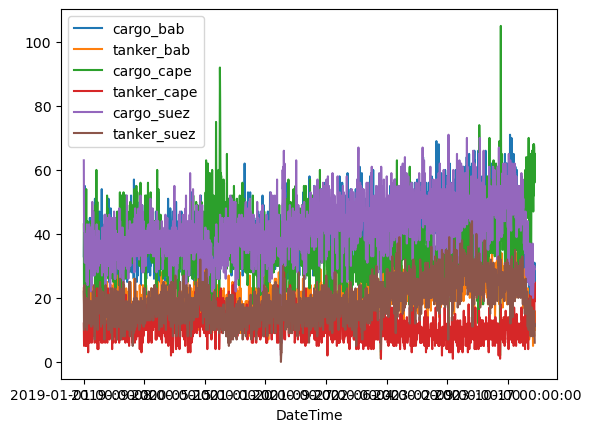

In [45]:
df.plot()